In [26]:
%matplotlib inline
import numpy as np
from qiskit import QuantumCircuit, execute, Aer, IBMQ, BasicAer
from qiskit.compiler import transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization import plot_histogram

In [27]:
#Para el numeral 1 se nos una funcion booleana, esta funcion tiene como entrada una cadena de bits
#que devuelve 0 o 1 dependiendo de la CNOT. f({x0,x1,x2,...})→ 0 o 1

In [28]:
#Es una funcion nos constante es balanceada, se verifica en el ultimo punto

In [29]:
#Dos qubits, y uno para el resultado
djCircuit = QuantumCircuit(2, 1)
barriers = True

#Pasamos el segundo registro al estado |1>
djCircuit.x(1)
if barriers:
    djCircuit.barrier()
    
#aplicacion compuerta H
djCircuit.h(range(2))
if barriers:
    djCircuit.barrier()
    
#aplicacion compuerta cx
djCircuit.cx(0, 1)
if barriers:
    djCircuit.barrier()

#de nuevo aplicamos H al segundo registro
djCircuit.h(range(1))

#realizamos la medicion
djCircuit.measure(range(1), range(1))

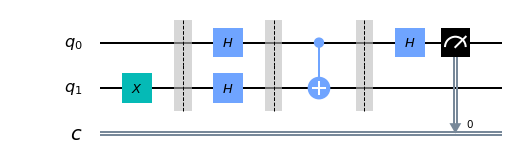

In [30]:
#dibujo del circuito
djCircuit.draw(output='mpl')

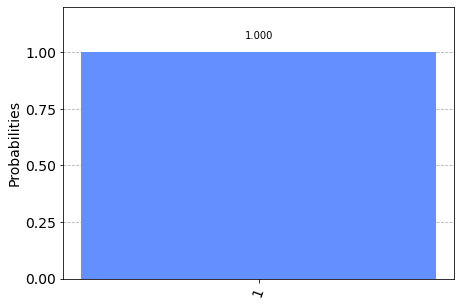

In [31]:
#Evaluacion
backend = BasicAer.get_backend('qasm_simulator')
shots = 100
results = execute(djCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)